<a href="https://colab.research.google.com/github/Hassanat-Awodipe/DPhi_Bootcamp_Projects/blob/main/Analysis_of_an_Online_shopping_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DPhi Pandas Assignment Details

Dear Learner, 

Congratulations, you have studied Pandas all the way through the end of this bootcamp!!! This is the final graded hands-on exercise where you will be accomplishing the below mentioned task.

# Step 1: Select a Dataset of your choice

*   https://www.kdnuggets.com/datasets/index.html
*   https://dphi.tech/challenges/#past 
* https://pub.towardsai.net/best-datasets-for-machine-learning-data-science-computer-vision-nlp-ai-c9541058cf4f  
* https://medium.com/analytics-vidhya/top-100-open-source-datasets-for-data-science-cd5a8d67cc3d


or you can pick any dataset of your interest on the internet and add reference to it

# Evaluation Criteria

Your submission will be evaluated using the following criteria:

* You must ensure that the dataset is tabular.  
* You must ask and answer at least 3 questions about the dataset
*   Your submission must include explanations using markdown cells, apart from the code.
*   Your work must not be plagiarized i.e. copied for somewhere else.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
import warnings
warnings.filterwarnings("ignore")

**INTRODUCTION**:

This is the dataset for an online shoppig website. Each entry is for a unique session, independent of the user.

A session is a group of user interactions with your website that takes place within a given time frame. A single user can open multiple sessions but not concurrently. Opening multiple pages on different tabs of the same website is counted as a single session as long as the session is still counting. By default, a session ends based on time (after 30mins of inactivity or at midnight or campaign change (if a user arrives via one campaign, leaves, and then comes back via a different campaign)

The administrative, informational and product related describe the types of pages of the website. The duration represents the amount of time spent on that particular page.

According to Google analytics, bounce rate is the percentage of all sessions on your site in which users viewed only a single page(first page) and triggered only a single request to the Analytics server. Exit Rate is the percentage that were the last in the session, for all pageviews that lead to the page.

For example, a user finds their way to a page on your website and then closes the website without clicking any button on it. Here the bounce rate is a 100%. If the user decides to click a button or two more buttons that lead to other pages of the website then the bounce rate for that first page no longer exists. An exit rate would exist for the last page before he closes the website. There is neither a bounce nor exit rate for pages in between. This is not to say that bounce and exit rates are mutually exclusive but it will depend on the number of sessions considered.

Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue. If the session does not end up as a revenue, page value will be still be recorded as long as the user makes it to the goal page. Each page has its own pagevalue, if set.


All definitions have been gotten from [Google Analytics](https://support.google.com/analytics/?hl=en#topic=10737980)


**OBJECTIVE**: To understand how the actions in a session affect a user's decision to make a purchase

In [2]:
#https://s3.us-west-1.wasabisys.com/dphi/datasets/179/training_data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=WfvqqwJ74ua9qD4K4IDignwn6lM%3D&Expires=1645556967

from google.colab import files
uploaded = files.upload()

Saving Online Shopping data.csv to Online Shopping data.csv


#Step 2: Perform Data Cleaning/Preparation & Analysis

1. Create data frame(s) from CSV files
2. Perform index operations on data frame(s)
3. Apply Group, merge and aggregate data frame(s)
4. Check for missing and invalid values in data
5. Propose a way to treat the missing and invalid values and implement the same on the dataframe
5. Compute the mean, sum, range and other interesting statistics for numeric columns


In [56]:
shop_int_data = pd.read_csv("Online Shopping data.csv")
shop_int_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,2,New_Visitor,True,0
1,0,0.00,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,10,Returning_Visitor,False,0
2,3,157.40,0,0.0,9,128.500000,0.036364,0.081818,0.0,0.0,Jul,3,2,1,3,Returning_Visitor,True,0
3,3,120.00,0,0.0,5,198.000000,0.000000,0.014286,0.0,0.0,May,3,3,4,2,New_Visitor,True,0
4,4,37.25,1,5.0,50,1295.008333,0.000893,0.015595,0.0,0.0,Nov,3,2,4,2,Returning_Visitor,True,1


In [5]:
#we view the information of the entire dataset. There are some columns that are unnecessary like operating system and browser but for now, we leave it in the table.
shop_int_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

From the info, there are no missing values. It is easy to see that there are no duplicated columns. We check for duplicated rows.

In [57]:
#we check for duplicated rows as this can cause a bias in our analysis
shop_int_data.duplicated().sum()

92

In [58]:
#assign the data bool_series. Keep only the first of duplicates. False shows that there are not duplicates.
bool_series = shop_int_data.duplicated(keep='first')

In [59]:
#Take all False and store as the data but NOT True. View the dataset without the duplicated rows
shop_int_data = shop_int_data[~bool_series]

In [60]:
print(shop_int_data.duplicated().sum())
print(shop_int_data.shape)

0
(9772, 18)


After removing the duplicates, we have 9772 rows to work with.

Another cleaning is to consider the page views and their duration. We could have said if more than 1 page was viewed then the duration cannot be zero but we did not because it is possible to switch from one page to another within a min.

In [24]:
#if more than two administrative pages were viewed then the administration duration cannot be 0
shop_int_data[(shop_int_data['Administrative'] > 2) & (shop_int_data['Administrative_Duration'] == 0)].shape

(0, 18)

In [25]:
#if no administrative page was viewed then the administrative duration cannot be greater than 0. Note than one administrative page can be viewed and the duration 
#will still be zero because the user bounced off the page without any further clicks.
shop_int_data[(shop_int_data['Administrative'] == 0) & (shop_int_data['Administrative_Duration'] > 0)].shape

(0, 18)

In [26]:
#if more than two informational pages were viewed then the duration cannot be 0
shop_int_data[(shop_int_data['Informational'] >  2) & (shop_int_data['Informational_Duration'] == 0)].shape

(0, 18)

In [27]:
#if no informational page was viewed then the duration cannot be greater than 0. Note than one informational page can be viewed and the duration will still be 
#zero because the user bounced off the page without any further clicks.
shop_int_data[(shop_int_data['Informational'] == 0) & (shop_int_data['Informational_Duration'] > 0)].shape

(0, 18)

In [61]:
#if more than two product related pages were viewed then the duration cannot be 0
shop_int_data[(shop_int_data['ProductRelated'] >  2) & (shop_int_data['ProductRelated_Duration'] == 0)].shape

(48, 18)

There ought to be no rows for the above code just as is the case with the previous types of pages.

Anyway, it is easy to guess that these sessions did not yield a revenue because the product related page was opened but no further action taken. No event was recorded since the duration is 0.0. All the multiple pages must have been opened on different tabs of the browser and subsequently closed.

Therefore, we shall remove this data as it can create a bias.

In [62]:
# we drop the rows where more than two product related pages were viewed and the duration was 0.
bias_data = shop_int_data[(shop_int_data['ProductRelated'] >  2) & (shop_int_data['ProductRelated_Duration'] == 0)].index

shop_int_data.drop(bias_data, inplace = True)

shop_int_data.shape

(9724, 18)

In [39]:
#if no product related page was viewed then the duration cannot be greater than 0. Note than 1 product related page can be viewed and the duration will still 
#be zero because the user bounced off the page without any further clicks.
shop_int_data[(shop_int_data['ProductRelated'] == 0) & (shop_int_data['ProductRelated_Duration'] > 0)].shape

(0, 18)

Another cleaning to consider is that of the page value. Looking through the entire dataset, we can see that there is a column for pagevalue. This means that a goal page and its corresponding value must have been set on the website. The ecommerce transaction page would also have a page value which is the price of the transaction.

In [40]:
#if revenue equals to 1 then page value cannot be zero
shop_int_data[(shop_int_data['Revenue'] ==  1) & (shop_int_data['PageValues'] == 0)].shape

(0, 18)

In this case, we may want to assume that the pages viewed including the page for ecommerce trnasaction has no page value set or were not included as a goal page. But this is not the case for this dataset.



It appears that there are more unset pagevalues than set pagevalues. This we will see by comparing the page value and the product related page. 

In [63]:
#a product related page was viewed and a pagevalue was not assigned.

shop_int_data[(shop_int_data['ProductRelated'] >  0) & (shop_int_data['PageValues'] ==  0)].shape

(7539, 18)

Once again this proves that, some page value were not set.

If we are sure that a page value is set (because other sessions have a page value), then page values cannot be zero when there is a revenue and/or when a product related page is viewed (greater than 0).

In any circumstance, the page for the online payment is supposed to have a page value. Therefore, we shall clean the above data where revenue is 1 and pagevalue is 0.

In [64]:
#assuming a pagevalue is set for the payment page, let us delete the rows where pagevalue is 0 and revenue is 1 because it 
#is very likely a false revenue.

false_revenue1 = shop_int_data[(shop_int_data['PageValues'] ==  0) & (shop_int_data['Revenue'] == 1)].index

shop_int_data.drop(false_revenue1, inplace = True)

shop_int_data.shape

(9437, 18)

In [43]:
#similarly, if no revenue was made then page value cannot be greater than 0.
shop_int_data[(shop_int_data['PageValues'] >  0) & (shop_int_data['Revenue'] == 0)].shape

(0, 18)

In [65]:
false_revenue2 = shop_int_data[(shop_int_data['PageValues'] >  0) & (shop_int_data['Revenue'] == 0)].index

shop_int_data.drop(false_revenue2, inplace = True)

shop_int_data.shape

(8520, 18)

This brings us to the end of cleaning the data. Now, lets check the info to identify any changes.

In [66]:
shop_int_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8520 non-null   int64  
 1   Administrative_Duration  8520 non-null   float64
 2   Informational            8520 non-null   int64  
 3   Informational_Duration   8520 non-null   float64
 4   ProductRelated           8520 non-null   int64  
 5   ProductRelated_Duration  8520 non-null   float64
 6   BounceRates              8520 non-null   float64
 7   ExitRates                8520 non-null   float64
 8   PageValues               8520 non-null   float64
 9   SpecialDay               8520 non-null   float64
 10  Month                    8520 non-null   object 
 11  OperatingSystems         8520 non-null   int64  
 12  Browser                  8520 non-null   int64  
 13  Region                   8520 non-null   int64  
 14  TrafficType             

# Step 3: Exploration & Inference

1. Ask at least 3 interesting questions about your dataset
2. Answer the questions by computing the results using Pandas library
3. Add concluding remarks


#**1. How many percentage of the dataset yielded a revenue?**

In [72]:
#all rows for positive revenue
shop_int_data[shop_int_data['Revenue'] == 1].shape

(1239, 18)

In [ ]:
#no of rows with positive revenue times 100 divided by the total no of rows after cleaning

(1239 * 100)/ 8568

14.46078431372549

14% of the entire dataset yielded a postive revenue. Some of the positive revenue were cleaned out as false revenue.

263 revenue were from New visitors and 11 from Other visitos while the rest (965) were from returning visitors. 

86% of the dataset yielded zero revenue. This means we have more data for no revenue than for revenue.

Although there are less entries for revenue, most of the analysis will be based on revenue to see how the ecommerce company can further improve on them.

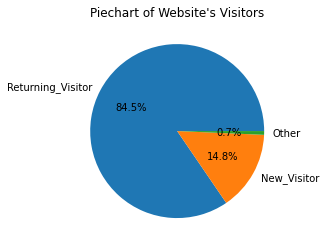

In [ ]:
#representation of all website visitors

visitor_numbers = shop_int_data['VisitorType'].value_counts()
plt.title("Piechart of Website's Visitors")

visitor_type = ['Returning_Visitor','New_Visitor', 'Other' ]
plt.pie(visitor_numbers, labels = visitor_type, autopct='%0.1f%%')

print('')
plt.show() 

#**2. What region did most visitors come from?**

In [73]:
#region of visitors
shop_int_data['Region'].value_counts()

1    3325
3    1617
4     813
2     780
6     579
7     545
9     355
8     290
5     216
Name: Region, dtype: int64

In [75]:
#visitors were mostly from region 1.
shop_int_data[(shop_int_data['Region']==1) & (shop_int_data['Revenue'] == 1)].shape

(483, 18)

In [ ]:
#483 shoppers from region 1.
shop_int_data[(shop_int_data['Revenue']==1)]['Region'].value_counts()

1    483
3    221
2    132
4    120
7     82
6     73
9     60
5     35
8     33
Name: Region, dtype: int64

Most of the website visitors are from region 1. And most of the visitors who actually bought are also from region 1. There are 9 regions in total.

#**3. What is the average time needed for a visitor to decide to make a purchase?**

In [82]:
#addition of all durations
total_time = shop_int_data.Administrative_Duration + shop_int_data.Informational_Duration + shop_int_data.ProductRelated_Duration
print(max(total_time))

#to find the session number, we create a column for total_time so that it can be easily matched to the session number entry.
shop_int_data['total_time'] = total_time
shop_int_data.head()

34576.950693


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
0,0,0.0,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,2,New_Visitor,True,0,354.000000
1,0,0.0,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,10,Returning_Visitor,False,0,764.666667
2,3,157.4,0,0.0,9,128.500000,0.036364,0.081818,0.0,0.0,Jul,3,2,1,3,Returning_Visitor,True,0,285.900000
3,3,120.0,0,0.0,5,198.000000,0.000000,0.014286,0.0,0.0,May,3,3,4,2,New_Visitor,True,0,318.000000
5,0,0.0,0,0.0,4,66.000000,0.000000,0.050000,0.0,0.0,Dec,1,1,8,2,Returning_Visitor,False,0,66.000000


In [80]:
#find max, mean, min of total_time where revenue is 1
revenue_time = shop_int_data[(shop_int_data['Revenue']==1)]['total_time']
max(revenue_time), revenue_time.mean(), min(revenue_time)

(23340.8109167, 2114.378274063086, 15.6)

This shows that the minimum duration for a user to decide to make a purchase is 15.6s, the max duration is 23340s and the average duration is 2114s. 

Spending a longer duration on the website also does not indicate that the user will be convinced to buy. The highest duration spent on this website is 34576.95 and it yielded 0 revenue. 

#**4. What browser and operating system is mostly used? How does this affect navigating the website and making a purchase?**

In [ ]:
#OS mostly used
shop_int_data['OperatingSystems'].value_counts()

2    4555
3    1805
1    1793
4     340
8      56
6      12
7       4
5       3
Name: OperatingSystems, dtype: int64

In [ ]:
#Browser mostly used
shop_int_data['Browser'].value_counts()

2     5512
1     1709
4      504
5      328
6      120
10     120
8      100
3       82
13      44
7       37
12       8
11       3
9        1
Name: Browser, dtype: int64

In [83]:
#displaying the data of the most used browser and OS with positive revenue
shop_int_data[(shop_int_data['OperatingSystems']==2) & (shop_int_data['Browser']==2) & (shop_int_data['Revenue']==1)].shape

(587, 19)

In [84]:
#when revenue is 0
shop_int_data[(shop_int_data['OperatingSystems']==2) & (shop_int_data['Browser']==2) & (shop_int_data['Revenue']==0)].shape

(2878, 19)

There are more zero revenue when browser 2 and OS 2 are used so this does not really affect the decision to make a purchase. However, it might make navigating the website much more easier.

#**4. Using more desriptive traffic sources, analyse the dataset.**

The entries of traffic type for the dataset does not give enough information. Traffic type defines the method or medium by which visitors reach the website.

For this analysis and as an assumption, I have decided to group the numbers into 4 groups and assign each group a traffic medium based on Google Analytics:
1. 1-5 Direct traffic
2. 6-10 Organic referral
3. 11-15 Social referral
4. 16-20 Paid referral

Direct means that they directly used your URL link to get to the website. it could be that have it in their bookmarks.

Organic means they got to the website through a search engine like google, bing.

Social means they used a link found on social media like twitter, facebook, etc.

Paid means they clicked a sponosred ad that was paid for to promote the website.



In [85]:
#form the traffic groups and insert into the dataset
shop_int_data['TrafficType'].replace(dict.fromkeys([1, 2, 3, 4, 5], 'Direct'), inplace = True)
shop_int_data['TrafficType'].replace(dict.fromkeys([6, 7, 8, 9, 10], 'Organic'), inplace = True)
shop_int_data['TrafficType'].replace(dict.fromkeys([11, 12, 13, 14, 15], 'Social'), inplace = True)
shop_int_data['TrafficType'].replace(dict.fromkeys([16, 17, 18, 19, 20], 'Paid'), inplace = True)
shop_int_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
0,0,0.0,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,Direct,New_Visitor,True,0,354.000000
1,0,0.0,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,Organic,Returning_Visitor,False,0,764.666667
2,3,157.4,0,0.0,9,128.500000,0.036364,0.081818,0.0,0.0,Jul,3,2,1,Direct,Returning_Visitor,True,0,285.900000
3,3,120.0,0,0.0,5,198.000000,0.000000,0.014286,0.0,0.0,May,3,3,4,Direct,New_Visitor,True,0,318.000000
5,0,0.0,0,0.0,4,66.000000,0.000000,0.050000,0.0,0.0,Dec,1,1,8,Direct,Returning_Visitor,False,0,66.000000


The numbers in the traffic column have been replaced by more descriptive traffic sources to a website.

In [89]:
#we group the dataset based on traffic type
traffic_data = shop_int_data.groupby(['TrafficType'])

#This shows the first members of each group
traffic_data.first() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue,total_time
TrafficType,,,,,,,,,,,,,,,,,,
Direct,0,0.0,0,0.0,12,354.000000,0.000000,0.018182,0.0,0.0,May,2,7,1,New_Visitor,True,0,354.000000
Organic,0,0.0,0,0.0,8,764.666667,0.025000,0.043750,0.0,0.0,Nov,3,2,4,Returning_Visitor,False,0,764.666667
Paid,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Nov,2,2,1,New_Visitor,True,0,0.000000
Social,1,56.0,0,0.0,7,92.500000,0.088889,0.122222,0.0,0.4,May,3,2,1,Returning_Visitor,False,0,148.500000


In [91]:
#we view all the members of organic traffic group
traffic_data.get_group('Organic').head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time
1,0,0.000000,0,0.0,8,764.666667,0.025000,0.043750,0.000000,0.0,Nov,3,2,4,Organic,Returning_Visitor,False,0,764.666667
16,1,19.666667,0,0.0,14,512.111111,0.028571,0.030000,0.000000,0.0,Mar,3,2,3,Organic,Returning_Visitor,True,0,531.777778
19,6,167.000000,0,0.0,71,1445.458333,0.004054,0.013964,12.308117,0.0,Nov,3,2,1,Organic,Returning_Visitor,False,1,1612.458333
24,4,229.250000,0,0.0,8,372.250000,0.022222,0.009524,0.000000,0.0,Dec,1,2,1,Organic,Returning_Visitor,False,0,601.500000
30,4,64.500000,0,0.0,28,852.333333,0.013793,0.024548,0.000000,0.0,May,2,2,1,Organic,New_Visitor,True,0,916.833333


The group is only formed in the traffic_data and does not apply to the main dataset called shop_int_data

**Q.  Bounce rate is calculated for the pages through which the user enters the website which we assume to be landing page for all sessions. How often did visitors click the wrong link? How does bounce rate affect the revenue?**

In reality, bounce rate is calculated when a visitor opens then closes the website. It is calculated for the first page of the website that a visitor gets to. For different users in one session, they will have different first pages depending on how they got to the website.

Because this is an ecommerce website and we expect visitors to view more than one page then a high bounce rate of 1 is bad.

In [ ]:
#find the mean bounce rate
shop_int_data['BounceRates'].mean()

0.02236010932714743

0.02 is a quite low bounce rate. This means that the people who stayed and continued browsing after the landing page opened are more than those who bounced off for the overall sessions of the dataset.

In [ ]:
#are there bounce rates of 1 that lead to a revenue? No.
shop_int_data[(shop_int_data['BounceRates']==1) & (shop_int_data['Revenue']==1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_time


In [92]:
#are there bounce rates higher than the mean that leads to a revenue?
shop_int_data[(shop_int_data['BounceRates'] > 0.02) & (shop_int_data['Revenue']==1)]['TrafficType'].shape

(55,)

As we can see from the result of this code, more than one page was viewed even with a bounce rate higher than the mean bounce rate. 

For bounce rate, you are only concerned about the initial page and how it affects the rest of your interaction with the website. How many people entered through this page? Did they leave or did they continue to browse the website? A low rate means they stayed and a high rate means they left.

A higher percentage of visitors in the above result showed that they got to the website directly through its link, so they had no reason to leave and consequently made a purchase.

**Q) Exit rate is calculated for the pages through which the users leave the website. How often did these clicks make it to the revenue page**

Assume the exit rate here is for the payment page. Users leave the website through this page to the external payment platform e.g Paypal. So, we want a high exit rate.  

That the visitors got to the payment page does not guarentee that they will pay. A non zero page value is the only indicator that a payment was made (as we noted during the preparation of the data).

In [ ]:
#find the mean exit rate for all the sessions.
shop_int_data['ExitRates'].mean()

0.044140405613794925

A mean of 0.04 shows that less people left through the payment page than those who, lets say, returned to the product related page or to the landing page.


**Q.) Do you think paid ads were effective for the purpose of special day?**

Special day is only recorded when there is a revenue.


In [ ]:
#type of traffic for a special day purchase
shop_int_data[(shop_int_data['SpecialDay'] > 0)]['TrafficType'].value_counts()

Direct     704
Social     135
Organic     61
Paid        16
Name: TrafficType, dtype: int64

In [ ]:
#view the count of each traffic type
shop_int_data['TrafficType'].value_counts()

Direct     6767
Organic     916
Social      720
Paid        165
Name: TrafficType, dtype: int64

Apparently, paid ads had no significant effect on purchases related to special day. 

A closer analysis shows that over 50% of the website visitors are by direct traffic. This suports the earlier analysis that 85% of the website visitors are Returning Visitors. This means that these visitors have a direct link to the website.

#**6.) Import a dataframe of age and sexes. Merge with the shop_int_data dataset and use if for the following analysis.**

As an assumption, this dataset will indicate the user for each session.

In [93]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [95]:
mall_customers = pd.read_csv('Mall_Customers.csv')
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



The annual income is in thousand dollars.

Since there are just 200 rows in the user dataset, we will create a smaller version of the shop_int_data dataset then merge with the user dataset.


In [102]:
#lets pick 200 rows between 5800 and 7000 of the shop_int_data
shop_int_data_short = shop_int_data.loc[5800:6030]


#drop unneccsary columns
shop_int_data_short.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','BounceRates', 'ExitRates', 'PageValues', 'Month',	'OperatingSystems',	'Browser','total_time'], axis =1, inplace=True)
shop_int_data_short.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

The two dataframes: shop_int_data_short and mall_customers do not have any series in common. i.e no common column(s).

So we insert the CustomerID series into the shop_int_data_short dataframe so that they can have a common column and then we use the merge function. By this way, we also get rid of the default index of the shop_int_data_short.

In [98]:
#this creates a common column, customerID, for the two datasets

shop_int_data_short['CustomerID'] = np.linspace(1,200,200)
shop_int_data_short.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue', 'CustomerID'],
      dtype='object')

In [99]:
#the datasets get merged and the common column is not repeated
users_data = mall_customers.merge(shop_int_data_short)
users_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,Male,19,15,39,25,1556.491429,0.0,4,Direct,Returning_Visitor,True,1
1,2,Male,21,15,81,30,440.533333,0.0,2,Direct,Returning_Visitor,True,0
2,3,Female,20,16,6,63,1021.000000,0.8,1,Direct,Returning_Visitor,False,0
3,4,Female,23,16,77,118,3903.167094,0.0,1,Direct,Returning_Visitor,False,1
4,5,Female,31,17,40,20,598.778571,0.2,1,Direct,New_Visitor,False,1


**Q) Which gender made the most purchase and spent more time on the website?**

In [103]:
#the number of males and females in the dataset
users_data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [113]:
#the number of females who made a purchase
users_data[(users_data['Genre'] =='Female') & (users_data['Revenue'] == 1)].shape

(13, 13)

In [110]:
#the number of males who made a purchase
users_data[(users_data['Genre'] =='Male') & (users_data['Revenue'] == 1)].shape

(13, 13)

In [106]:
#the total time spent by females on the website
users_data[(users_data['Genre'] =='Female')]['ProductRelated_Duration'].sum()

123014.98528929999

In [107]:
#the total time spent by males on the website
users_data[(users_data['Genre'] =='Male')]['ProductRelated_Duration'].sum()

101772.42754233

In [108]:
#the total time spent by all males when making a purchase
users_data[(users_data['Genre'] =='Male') & (users_data['Revenue'] == 1)]['ProductRelated_Duration'].sum()

31218.367303

In [109]:
#the total time spent by all females when making a purchase
users_data[(users_data['Genre'] =='Female') & (users_data['Revenue'] == 1)]['ProductRelated_Duration'].sum()

17871.4467284

Equal number of men and women made purchases on the website but men spent more time buying than women.

Generally, women spent more time on the website since there are more women than men in this dataset.

**Q.) What age grade has the highest income? How does this affect their spending?**

In [ ]:
max(users_data['Annual Income (k$)']), users_data['Annual Income (k$)'].mean(), min(users_data['Annual Income (k$)'])

(137, 60.56, 15)

In [114]:
#details of users who earned above the mean
users_data[(users_data['Annual Income (k$)'] >= 60.56)].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,Revenue
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,149.500000,37.872549,81.156863,50.372549,30.382353,1208.158247,0.074510,3.676471,0.117647
std,29.588849,12.153044,17.208532,29.236462,36.582754,1518.672046,0.217859,2.625698,0.323781
min,99.000000,18.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,124.250000,30.000000,69.250000,23.250000,7.250000,185.875000,0.000000,1.000000,0.000000
50%,149.500000,36.000000,78.000000,48.500000,17.500000,666.591667,0.000000,3.000000,0.000000
75%,174.750000,45.750000,87.750000,75.000000,36.500000,1737.580357,0.000000,6.000000,0.000000
max,200.000000,68.000000,137.000000,97.000000,188.000000,8038.325302,1.000000,9.000000,1.000000


In [115]:
#details of users who earned above the mean and made a purchase
users_data[(users_data['Annual Income (k$)'] >= 60.56) & (users_data['Revenue'] == 1)].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ProductRelated,ProductRelated_Duration,SpecialDay,Region,Revenue
count,12.00000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.0
mean,146.00000,40.583333,79.166667,48.083333,42.50000,1597.063914,0.083333,2.916667,1.0
std,30.00909,16.389899,18.009257,27.294549,47.19688,1726.072116,0.288675,2.234373,0.0
min,108.00000,19.000000,63.000000,5.000000,6.00000,245.000000,0.000000,1.000000,1.0
25%,117.50000,28.000000,65.000000,33.250000,9.75000,591.116667,0.000000,1.000000,1.0
50%,144.50000,38.500000,76.500000,44.500000,27.00000,868.295833,0.000000,3.000000,1.0
75%,165.00000,54.500000,81.250000,62.500000,50.00000,1775.835524,0.000000,3.250000,1.0
max,197.00000,68.000000,126.000000,97.000000,171.00000,5341.784253,1.000000,9.000000,1.0


In [119]:
#the income of everyone who made a purchase
users_data[users_data['Revenue'] == 1]['Annual Income (k$)'].describe()

count     26.000000
mean      57.653846
std       26.398397
min       15.000000
25%       44.250000
50%       57.000000
75%       75.250000
max      126.000000
Name: Annual Income (k$), dtype: float64

A little over half of the dataset earn above the mean income and made a purchase.

In the entire dataset, only 12 people out of 102 with an annual income above the mean made a purchase. This is closely related to those earning below the mean income.

Definitely, the annual income has no effect in deciding whether to buy or not.

In [ ]:
max(users_data['Age']), users_data['Age'].mean(), min(users_data['Age'])

(70, 38.85, 18)

In [121]:
#age range of those who earned above the annual income and made a purchase
users_data[(users_data['Annual Income (k$)'] > 60.56) & (users_data['Revenue'] == 1)]['Age'].describe()

count    12.000000
mean     40.583333
std      16.389899
min      19.000000
25%      28.000000
50%      38.500000
75%      54.500000
max      68.000000
Name: Age, dtype: float64

In [122]:
#age range of those earned below the annual income and made a purchase
users_data[(users_data['Annual Income (k$)'] <= 60.56) & (users_data['Revenue'] == 1)]['Age'].describe()

count    14.000000
mean     40.785714
std      15.645980
min      19.000000
25%      29.500000
50%      43.000000
75%      49.500000
max      64.000000
Name: Age, dtype: float64

In [123]:
#the ages of everyone who made no purchase
users_data[users_data['Revenue'] == 0]['Age'].describe()

count    174.000000
mean      38.574713
std       13.725747
min       18.000000
25%       29.000000
50%       36.000000
75%       48.000000
max       70.000000
Name: Age, dtype: float64


More people who earned lesser than the mean income made a purchases. Most of them were below the mean age of 38.

**Q.) How often were purchases done on weekends?**



In [124]:
users_data[(users_data['Revenue'] == 1) & (users_data['Weekend'] == True)].shape

(7, 13)

In [125]:
users_data[(users_data['Revenue'] == 1) & (users_data['Weekend'] == False)].shape

(19, 13)

There are more purchases on weekdays than on weekends. 

**CONCLUSION**:

1. There website has a lot of loyal customers.
2. Majority of visitors use browser 2 and OS 2.
3. Page value settings was nor t consistent across the sessions.
4. The website has a good bounce and exit rates.
5. People rather shop on weekdays.